<a href="https://colab.research.google.com/github/mrj760/Data-Science-Assignments/blob/main/CS410_Assignment_5_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer as mkxform, make_column_selector as mksel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# from sklearn.pipeline import make_pipeline as mkpipe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
drive.mount("/content/drive")
drivepath = Path() / '/content' / 'drive' / 'MyDrive'

WALMART = pd.read_csv(drivepath / 'walmart.csv')
WALMART

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
''' Y (Weekly Sales) is numeric so this is a regression problem. '''
walmart = WALMART.drop(columns='Date')
X_cols = list(walmart.columns)
X_cols.remove('Weekly_Sales')
y_cols = ['Weekly_Sales']
print(f"X columns : {X_cols}")
print(f"y columns : {y_cols}")

X columns : ['IsHoliday', 'Temperature', 'Fuel_Price', 'Unemployment', 'MarkDown']
y columns : ['Weekly_Sales']


In [ ]:
categs = mksel(dtype_include=object)
nums = mksel(dtype_include=np.number)
print(f"Ordinal Columns   : {categs(walmart)}")
print(f"Numerical Columns : {nums(walmart)}")

categ_linear_proc = OneHotEncoder(handle_unknown="ignore")
num_linear_proc = MinMaxScaler()

xform = mkxform((categ_linear_proc, categs),
                (num_linear_proc, nums), 
                remainder="passthrough")
xwalmart = xform.fit_transform(walmart)
xwalmart = pd.DataFrame(xwalmart, columns=xform.get_feature_names_out())
xwalmart = xwalmart.rename(columns = (lambda x: x.replace("onehotencoder__",'').replace("minmaxscaler__",'')))
xwalmart = xwalmart.dropna().assign(intr=1)[['intr', *xwalmart.columns]]
xwalmart

Ordinal Columns   : ['IsHoliday', 'MarkDown']
Numerical Columns : ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']


,intr,IsHoliday_No,IsHoliday_Yes,MarkDown_MarkDown1,MarkDown_MarkDown2,MarkDown_MarkDown3,MarkDown_MarkDown4,MarkDown_MarkDown5,MarkDown_No Markdown,Weekly_Sales,Temperature,Fuel_Price,Unemployment
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.241254,0.122844,0.041637,1.000000
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.731676,0.055289,0.024408,1.000000
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.628460,0.080533,0.000000,1.000000
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.113023,0.199644,0.033740,1.000000
4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.169332,0.197333,0.079684,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.102438,0.723200,0.826992,0.218526
139,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.171110,0.589333,0.791816,0.000000
140,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.191074,0.490489,0.780330,0.000000
141,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.224084,0.579022,0.775305,0.000000


In [ ]:
X_cols = list(xwalmart.columns)
X_cols.remove('Weekly_Sales')
X = xwalmart[X_cols]
y = xwalmart.loc[X.index, 'Weekly_Sales']

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

print(f'X: {X}')
print(f'y: {y}')

print(f'X Shape: {X.shape} matrix')
print(f'y Shape: {y.shape} vector\n')

X:      intr  IsHoliday_No  IsHoliday_Yes  MarkDown_MarkDown1  MarkDown_MarkDown2  MarkDown_MarkDown3  MarkDown_MarkDown4  MarkDown_MarkDown5  MarkDown_No Markdown  Temperature  Fuel_Price  Unemployment
0       1           1.0            0.0                 0.0                 0.0                 0.0                 0.0                 0.0                   1.0     0.122844    0.041637      1.000000
1       1           0.0            1.0                 0.0                 0.0                 0.0                 0.0                 0.0                   1.0     0.055289    0.024408      1.000000
2       1           1.0            0.0                 0.0                 0.0                 0.0                 0.0                 0.0                   1.0     0.080533    0.000000      1.000000
3       1           1.0            0.0                 0.0                 0.0                 0.0                 0.0                 0.0                   1.0     0.199644    0.033740      1.0000

In [ ]:
''' Why does this not work when random_state=42 ? '''
# xtr, xtest, ytr, ytest = train_test_split(X, y, test_size=.2, random_state=42) # x-training, x-test, y-training, y-test

xtr, xtest, ytr, ytest = train_test_split(X, y, test_size=.2, random_state=6) # x-training, x-test, y-training, y-test

print(f'Training set size: {len(xtr)} rows')
print(f'Test set size: {len(xtest)} rows')

Training set size: 114 rows
Test set size: 29 rows


In [ ]:
xtr

,intr,IsHoliday_No,IsHoliday_Yes,MarkDown_MarkDown1,MarkDown_MarkDown2,MarkDown_MarkDown3,MarkDown_MarkDown4,MarkDown_MarkDown5,MarkDown_No Markdown,Temperature,Fuel_Price,Unemployment
130,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.901511,0.648241,0.218526
23,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.848889,0.078248,0.791911
53,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017600,0.364681,0.762557
125,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.879644,0.554200,0.371820
27,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.917333,0.127782,0.791911
...,...,...,...,...,...,...,...,...,...,...,...,...
141,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.579022,0.775305,0.000000
79,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.984178,0.806892,0.906067
109,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.415289,0.829146,0.505545
106,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.176356,0.715004,0.505545


In [ ]:
ytr

130    0.048565
23     0.060701
53     0.542328
125    0.027534
27     0.023204
         ...   
141    0.224084
79     0.000056
109    0.153356
106    0.917964
138    0.102438
Name: Weekly_Sales, Length: 114, dtype: float64

In [ ]:
def fit(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# print(xtr.T @ xtr)
theta = fit(xtr, ytr)
theta

0    -1.554900e+15
1     1.554900e+15
2     1.554900e+15
3    -1.031082e+00
4    -7.186739e-01
5    -1.289146e+00
6    -4.396547e-01
7    -7.868224e-01
8    -9.804826e-01
9    -3.983707e-01
10    8.825442e-02
11   -5.141603e-02
dtype: float64

In [ ]:
def predict(theta, input):
    return input.values @ theta

def mae(output, pred): # Mean Absolute Error
    return np.mean(abs(output-pred))

def mse(output, pred): # Mean Squared Error
    return np.mean((output-pred)**2)

print(f'Absolute Error of theta in Test Set: {mae(ytest, predict(theta, xtest))}')
print(f'Mean-Squared Error of theta in Test Set: {mse(ytest, predict(theta, xtest))}')

Absolute Error of theta in Test Set: 0.20303096080831545
Mean-Squared Error of theta in Test Set: 0.0553146326867392


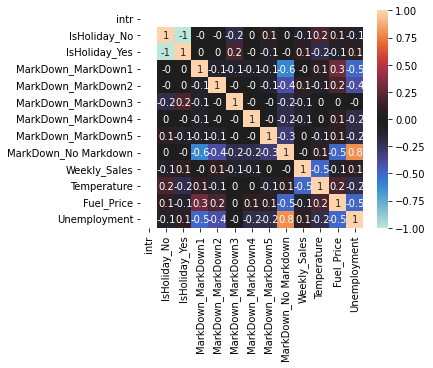

In [ ]:
plt.figure(figsize=(5,4))
sb.heatmap(xwalmart.corr().round(1), center=0, annot=True)

In [ ]:
skmodel = LinearRegression().fit(xtr, ytr)
skpred = skmodel.predict(xtest)
# mse(ytest, skpred)
print(f'Absolute Error of theta in Test Set: {mae(ytest, skpred)}')
print(f'Mean-Squared Error of theta in Test Set: {mse(ytest, skpred)}')

Absolute Error of theta in Test Set: 0.14886927975842626
Mean-Squared Error of theta in Test Set: 0.056616498682198486


###.
###.
###.
###.
###Ignore below. I thought we were doing gradient descent...

In [ ]:
# def linear(thetas, X):
#     return thetas[0] + thetas[1] * X

# def mse_loss(thetas, X, y):
#     linear_hyp = linear(thetas, X)
#     linear_error = y - linear_hyp
#     linear_error_sq = linear_error ** 2
#     return np.mean(linear_error_sq)

# def mse_loss_gradient(thetas, X, y):
#     grad0 = y - linear(thetas, X)
#     grad1 = grad0 * X
#     return -2 / len(X) * np.array([np.sum(grad0), np.sum(grad1)])

# def minimize(X, y, loss_func=mse_loss, loss_gradient_func=mse_loss_gradient, alpha=.0005, delta=.0001, display=-1):
#     thetas = [1,1]
#     loss = loss_func(thetas, X, y)

#     whenprint = display
#     while True:

#         if display != -1:
#             display += 1
#             if (display % whenprint==0):
#                 print(f"thetas : {thetas} || loss : {loss}")

#         grad = loss_gradient_func(thetas, X, y)
#         thetas -= (alpha * grad)
#         old_loss = loss
#         loss = loss_func(thetas, X, y)

#         if (abs(loss-old_loss)) < delta:
#             return thetas

# X_cols = list(xwalmart.columns)
# X_cols.remove('minmaxscaler__Weekly_Sales')
# X = xwalmart[X_cols]
# y = xwalmart['minmaxscaler__Weekly_Sales']

# xtr, xtest, ytr, ytest = train_test_split(X, y, test_size=.2)

# thetas = minimize(xtr,ytr,display=1)